In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [16]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
28 * 28

784

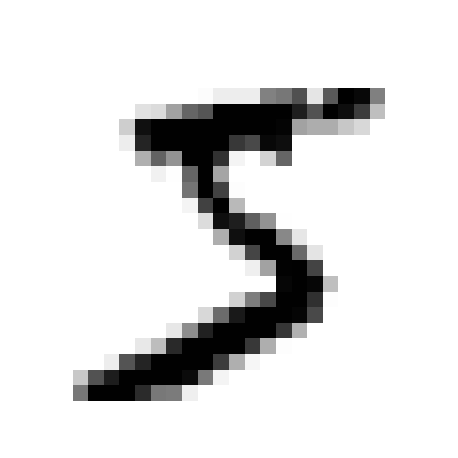

In [104]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")  # extra code
plt.show()

In [105]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [106]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

NameError: name 'mpl' is not defined

<Figure size 900x900 with 0 Axes>

In [10]:
y[0]

'5'

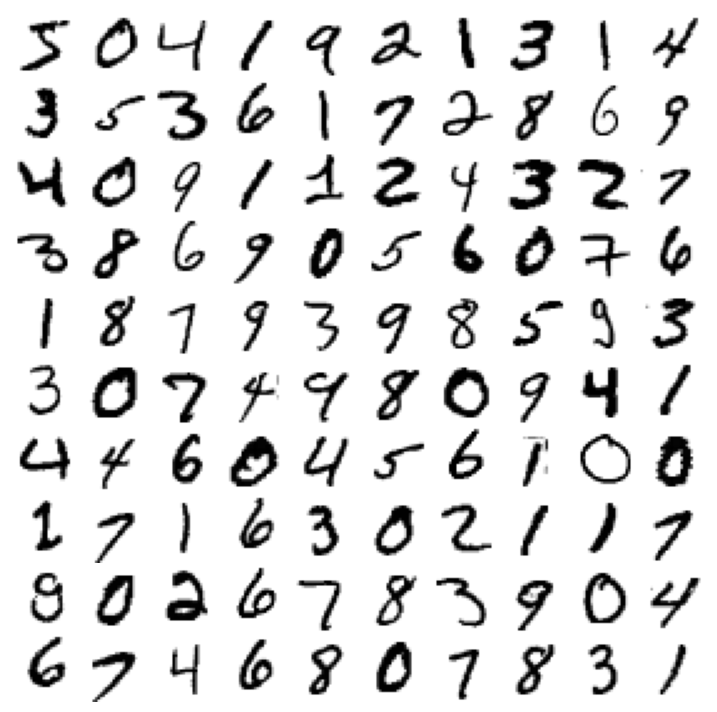

NameError: name 'mpl' is not defined

<Figure size 900x900 with 0 Axes>

In [ ]:
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()


In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

TRAINING A BINARY CLASSIFIER

In [13]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([some_digit])

array([ True])

PERFORMANCE MEASURES

Measuring Accuracy using Cross-Validation

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [18]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [19]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

Confusion Matrix

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [22]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

Precision and Recall

In [23]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

In [24]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [25]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.6511713705958311

In [26]:
# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [27]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [28]:
# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

Precision/Recakk Trade-off

In [29]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [30]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [31]:
y_some_digit_pred

array([ True])

In [32]:
# extra code – just shows that y_scores > 0 produces the same result as
#              calling predict()
y_scores > 0

array([ True])

In [33]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [34]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [35]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

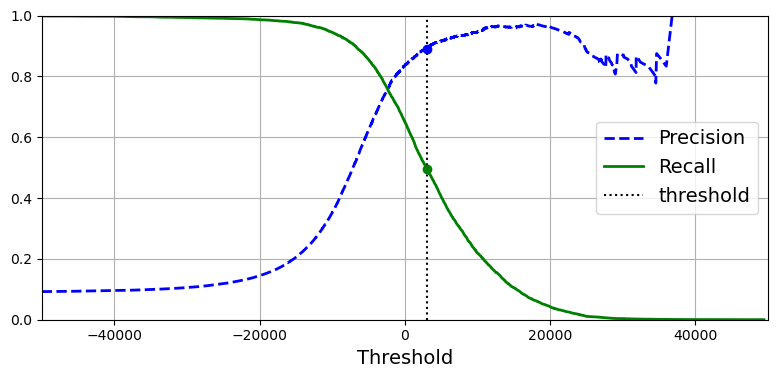

In [42]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

Another way to select a good precision recall trade-off is to plot precision directly against recall.

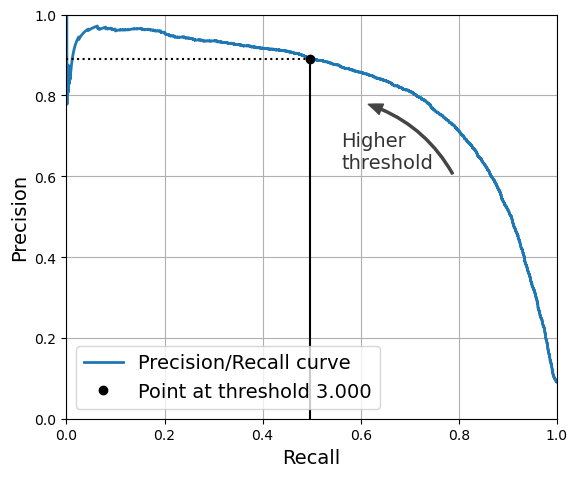

In [39]:
import matplotlib.patches as patches

plt.figure(figsize=(6,5))

plt.plot(recalls, precisions, linewidth=2, label='Precision/Recall curve')

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], 'k')
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], 'k:')
plt.plot([recalls[idx]], [precisions[idx]], 'ko', label= 'Point at threshold 3.000')
plt.gca().add_patch(patches.FancyArrowPatch(
        (0.79, 0.60), (0.61, 0.78),
        connectionstyle='arc3, rad=.2',
        arrowstyle = 'Simple, tail_width = 1.5, head_width = 8, head_length = 10', color = "#444444"
))
plt.text(0.56, 0.62, 'Higher\nthreshold', color='#333333')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc='lower left')
save_fig('precision_vs_recall_plot')

plt.show()

You can see that precision starts to fall sharply around 80% recall. You probably want to select a precision/recall trade-off just before the drop.

Suppose that you aim for a 90% precisions. You look up the first plot and realize that you need to use a threshold about 8.000. To be more precise you can search for the lowest threshold that gives you a 90% precision.

In [43]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

To make predictions, instead of calling the classifier`s predict method, you can run this code:

In [44]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [45]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [46]:
recall_at_90_precisions = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precisions

0.4799852425751706

It is possible to create a classifier with virtually any precision you want: just set a high enough threshold, and you are done. A high-precision classifier is not very useful if its recall is to low!!

The ROC curve

It is very similar ti the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the 'true positive rate' (another name for recall) against the false positive rate. The FPR is the ratio of negatives instances that are incorrectly classifies as positive.

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

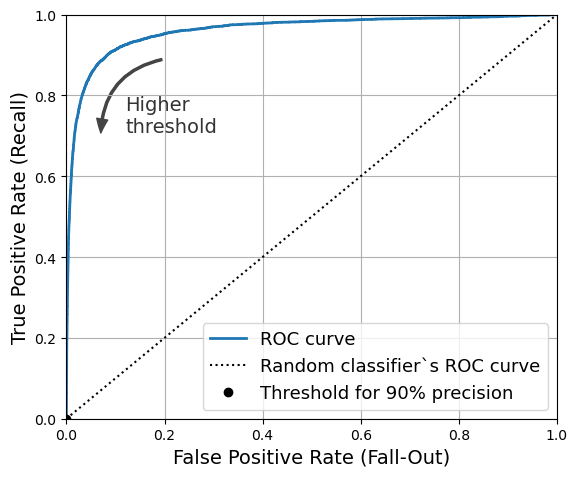

In [52]:
idx_for_threshold_at_90 = (threshold <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))
plt.plot(fpr,tpr, linewidth=2, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k:', label='Random classifier`s ROC curve')
plt.plot([fpr_90], [tpr_90], 'ko', label='Threshold for 90% precision')

# extra code – just beautifies and saves Figure
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07,0.70),
    connectionstyle='arc3, rad=.4',
    arrowstyle='Simple, tail_width=1.5, head_width=8, head_length=10', color='#444444'
))
plt.text(0.12, 0.71, 'Higher\nthreshold', color='#333333')
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0,1,0,1])
plt.legend(loc='lower right', fontsize=13)
save_fig('roc_curve_plot')

plt.show()

Once again there is a trade off: the higher the recall(TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

One way to measure classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC = 1.

In [54]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Let`s train a RandomDorestClassifier and compare its ROC curve and the ROC AUC score to those of the SDGClassifier.

In [55]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [56]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [57]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

These are estimated probabilities. Among the images that the model classified as positive with a probability between 50% and 60%, there are actually about 94% positive images:

In [58]:
# Not in the code
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


The ROC curve function expects labels and scores, but isntead of scores you can give it class probabilities. Let`s use the positive class´s probability as the score.

In [59]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

In [61]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

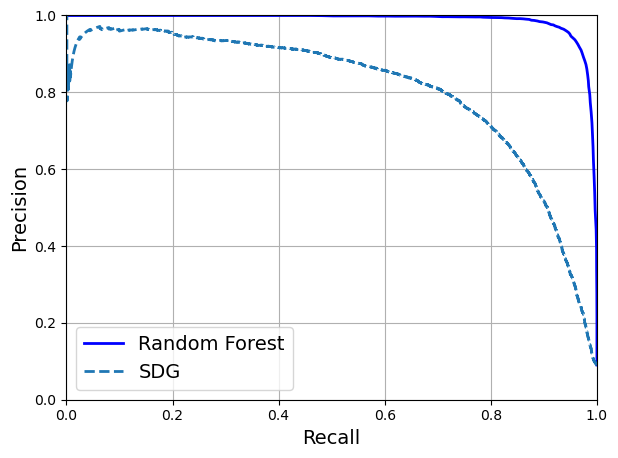

In [64]:
plt.plot(recalls_forest, precisions_forest, 'b-', linewidth=2, label='Random Forest')
plt.plot(recalls, precisions, '--', linewidth=2, label='SDG')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc='lower left')
save_fig('pr_curve_comparisson_plot')

plt.show()

We could use cross_val_predict(forest_clf, X_train, y_train_5, cv=3) to compute y_train_pred_forest, but since we already have the estimated probabilities, we can just use the default threshold of 50% probability to get the same predictions much faster:

In [65]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5 # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [66]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [67]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [68]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

Multiclass classification

One way to create a system that can classify the digit images into 10 classes is to train 10 binary classifier (one for each digit) and  then get the decision score for each one of them and select the classifier with the highest score. This is called one-versus-the-rest strategy (OvR). Another strategy is to train a classifier for every pair of digits: one to distinguish 0 and 1, one to distinguish 0 and 2.... This is called One-versus-One (OvO) strategy. The main advantage of OvO is that each classifier only needs to be trained  on the part of the training set for the two classes that it must distinguish.

Some algorithms such as SVM scale poorly with the size of the training set. For these algorithms OvO is preferred because is it faster to train mant tiny classifiers on small training sets that to train few classifiers on large training sets. For most binary algorithms however OvR is preferred.

LEt`s try a SVM classifier

In [69]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [70]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

If you call the decision function megthod, you will see it returns 0 scores per instance. Thats one score per class (it`s the number of won duels plus or minus a small tweak to break ties, based on the binary classifier scores):

In [71]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [72]:
class_id = some_digit_scores.argmax()
class_id

5

In [73]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [74]:
svm_clf.classes_[class_id]

'5'

If you want decision_function() to return all 45 scores, you can set the decision_function_shape hyperparameter to "ovo". The default value is "ovr", but don't let this confuse you: SVC always uses OvO for training. This hyperparameter only affects whether or not the 45 scores get aggregated or not:

In [75]:
# extra code – shows how to get all 45 OvO scores if needed
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

If you want to force scikit-learn to  use one-versus-one or oonne-versus-the-rest, you can use the OneVsOneClassifier or OneVsTheRestClassifier classes.

In [76]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [77]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [78]:
len(ovr_clf.estimators_)

10

Training an SGDClassifier is just as easy

In [81]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [80]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

Let`s evaluate this classifier using cross validation.

In [82]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

It gets 87% accuracy on all test folds. If you used  random classifier you would get a 10%. Its performances can be improved if we scale imputs.

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

Error analysis

First look at he confsion matrix. You need to make predictions using the cross_val_predict() method, then call the confusion matrix function

In [84]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

There is a lot of numbers, it is often more convenient to look at an image representation

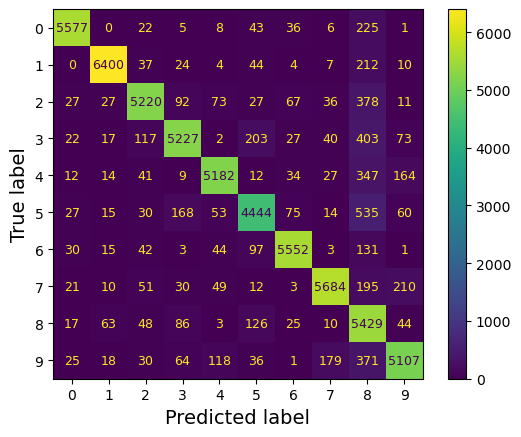

In [110]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

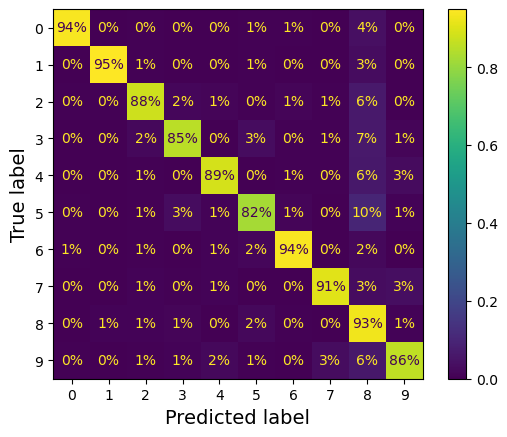

In [86]:
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

The confusion matrix lookr pretty good, since most of the images are on the main diagonal, which means were classified correctly.

Lets focus on plot the errors. First we need to divide each value in the confusion matrix by the number of images in the corresponding  class so you can compare error rates instead of absolute number of errors.

In [90]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Fill the diagonal with 0`s to keep only the errors, and plot the result

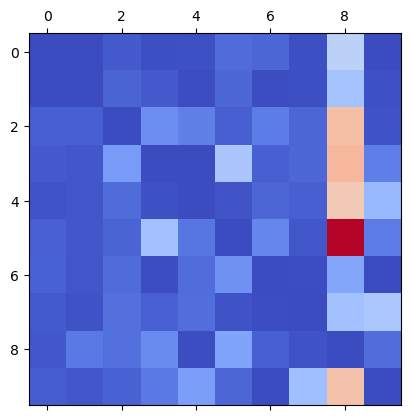

In [97]:
import numpy as np
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.coolwarm)
plt.show()

The columns for 8 is quite bright, which tells you that many images get misclassified as 8s. However the row for class 8 is not that bad, telling you that actual 8s in general get properly classified as 8s.

Analyzing the confusion matrix gives you insights in ways to improve your classifier Looking at this plot it looks like your efforts shold be focused on reducing the number of flase 8s. You could try to gather more training data for the digits that looks like 8 so the classifier can learn to distinguish them from real 8s. Or you could engineer new features that would help the classifier, for example, writing an algorithm to count the number of closed loops (8 has 2, 6 has 1, 5 has none). Or you could preprocess the images to make some patterns such as closed loops, stand out more.

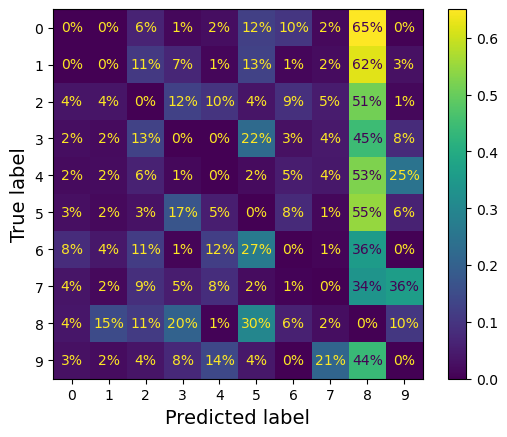

In [87]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

Let's put all plots in a couple of figures for the book:

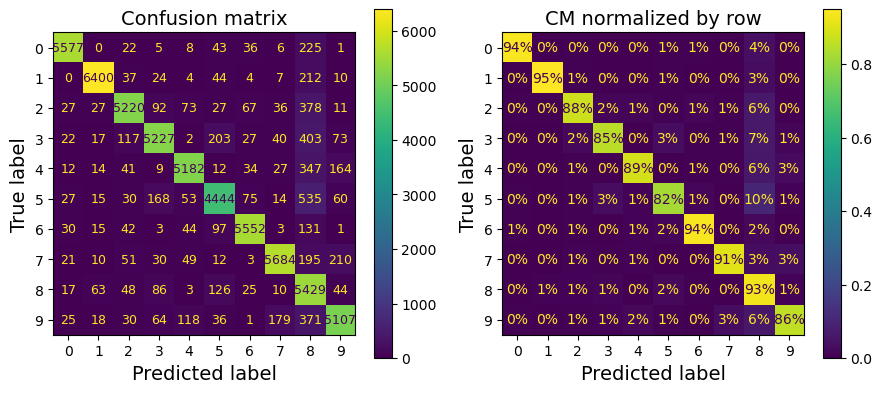

In [88]:
# extra code – this cell generates and saves Figure 3–9
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
save_fig("confusion_matrix_plot_1")
plt.show()

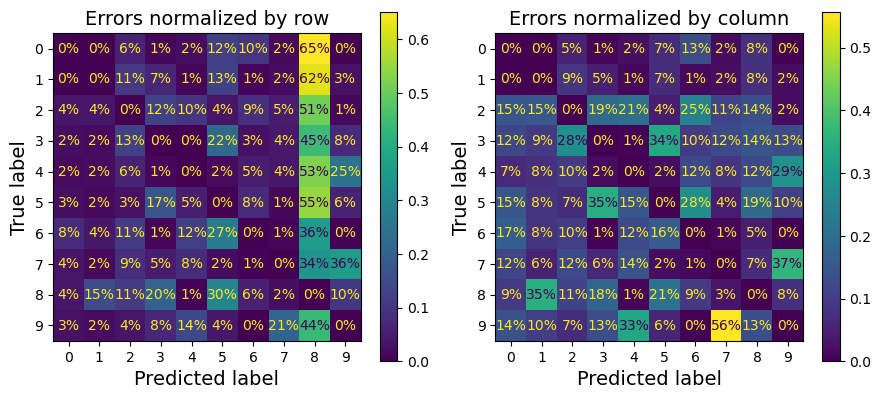

In [89]:
# extra code – this cell generates and saves Figure 3–10
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
save_fig("confusion_matrix_plot_2")
plt.show()
plt.rc('font', size=14)  # make fonts great again

Analyzing individual errors can also be a good way to gain insights on what your classifier is doing and why is it failing.

ZeroDivisionError: integer division or modulo by zero

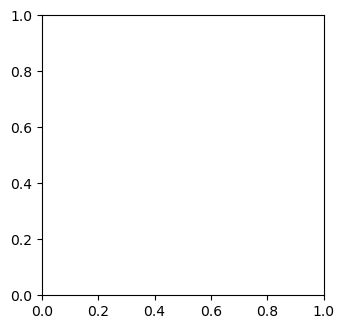

In [111]:
cl_a, cl_b = 3, 5
X_aa = X_train_scaled[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train_scaled[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train_scaled[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train_scaled[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

Most of the missclassified images seem like obvious errors to us. The problem may be that we used a simle SGDClassifier, which is a linear model. All it does is assign a weight to each pixel and when it sees a bew image it just sums up the weighted pixel intensities to get a score for each class. So since 3s and 5s differ only iby a few pixels, this model will easily confuse them.

The main difference between 3s and 5s is the position of the small line that joins the top line to the bottom arc. So one way to reduce the 3/5 confusion would be to preprocess the images to ensure that they are well centered and not too rotated. This will probably help reduce other errors as well.

Multilabel classification

In some cases you may want your classifier to output multipe classes for each instance. Consider a face recognition classifier.

In [122]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf .fit(X_train, y_multilabel)

KNeighborsClassifier()

In [114]:
knn_clf.predict([some_digit])

array([[False,  True]])

It gets it right, number five it is not a large digit bu it is odd.

There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on your project. One approach is to measure the F1 score for each individual label then simply cpmpute the average score.

In [115]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.9764102655606048

This assumes all labels are equally important, however if you have more images of a particular class you may want to give more weight to the classifier`s score on the class with less instances. In order to do thos simply set average='weighted'. 

Multioutput Classification

It is simply a generalization of multilabel classification where each label can be multiclass. Let`s start creating the training set and test set taking the MNIST images and adding noise to their pixel intensities.

In [116]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise 
noise = np.random.randint(0,  100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

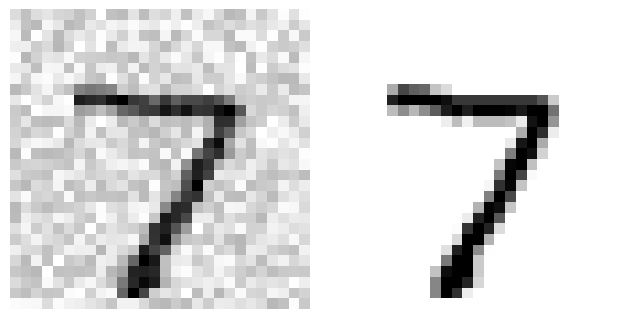

In [118]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig('noisy_digit_example_plot')
plt.show()

On the left is the noisy input image, on the right us the clean target image, let`s train the classifier and make it clean the image.

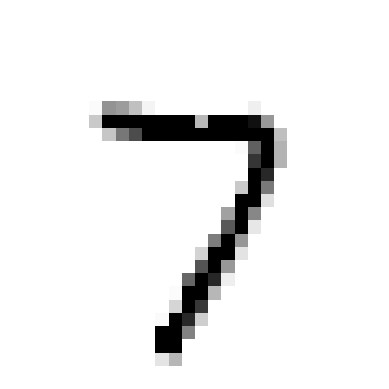

In [119]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

EXERCISES

Exercise 1 - 
Try to build a classifier for the MNIST dataset that achhieves over 97% accuracy on the test set. Hit: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try grid search on the weights and n_neightbors hyperparameters)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [6]:
y_knn_pred = knn_clf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9691

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(
    estimator=knn_clf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=1,
    verbose=1
)

In [9]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(weights='distance'), n_jobs=1,
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [10]:
print('Best score in validation', grid_search.best_score_)
print('Best params', grid_search.best_params_)

Best score in validation 0.9693333333333333
Best params {'n_neighbors': 3, 'weights': 'distance'}


In [11]:
knn_opt_clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_opt_clf.fit(X_train, y_train)


# accuracy_score(X_test, y_test)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [12]:
y_knn_opt_pred = knn_opt_clf.predict(X_test)
accuracy_score(y_knn_opt_pred, y_test)

0.9717

EXERCISE 2 -
Write a function that can shift an MNIST image in any direction (left,right, up, down) by one pixel. Then for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure accuracy on the test set.

In [13]:
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dx, dy], cval=0, mode='constant')
    return shifted_image.reshape([-1])

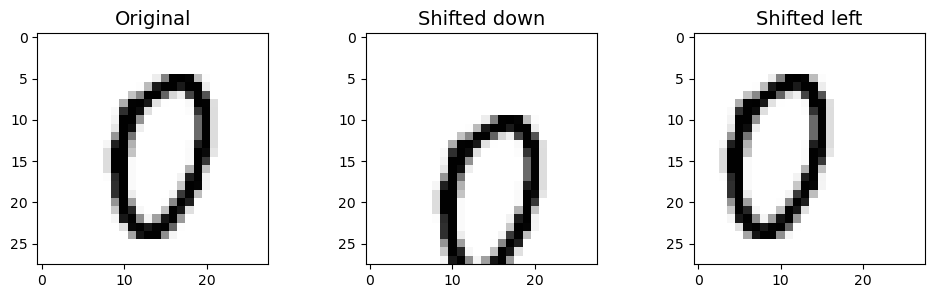

In [20]:
image = X_train[1000]
shifted_image_down = shift_image(image, 5, 0)
shifted_image_left = shift_image(image, 0, -5)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title('Original')
plt.imshow(image.reshape(28,28), interpolation='nearest', cmap='Greys')

plt.subplot(132)
plt.title('Shifted down')
plt.imshow(shifted_image_down.reshape(28,28), interpolation='nearest', cmap='Greys')

plt.subplot(133)
plt.title('Shifted left')
plt.imshow(shifted_image_left.reshape(28, 28), interpolation='nearest', cmap='Greys')

plt.show()


In [23]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1,0), (1,0), (0,1), (0,-1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

Shuffle augmented training set to avoid all shifted images to group together

In [24]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

Now let`s train the model using the best hyperparameters we found

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [26]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [27]:
augmented_accuracy = knn_clf.score(X_test, y_test)
augmented_accuracy

0.9763

Accuracy improved from 0.9717 to 0.9763, almost a 0.5%. I t may not look a lot but it actually means that the error rate dropped significantly.

In [30]:
error_rate_change = (1 - 0.9763) / (1 - 0.9717) - 1
print(f'error_rate_change = {error_rate_change:.0%}')

error_rate_change = -16%


EXERCISE 3 -

Tackle the Titanic dataset. A great place to start is on kaggle.

In [1]:

from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

In [3]:
train_data, test_data = load_titanic_data()

The data is already split into a training set and a test set. However, the test data does not contain the labels: your goal is to train the best model you can on the training data, then make your predictions on the test data and upload them to Kaggle to see your final score.

Let's take a peek at the top few rows of the training set:

In [4]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data['Fare'].mean()

32.204207968574636

The attributes have the following meaning:

PassengerId: a unique identifier for each passenger
Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
Pclass: passenger class.
Name, Sex, Age: self-explanatory
SibSp: how many siblings & spouses of the passenger aboard the Titanic.
Parch: how many children & parents of the passenger aboard the Titanic.
Ticket: ticket id
Fare: price paid (in pounds)
Cabin: passenger's cabin number
Embarked: where the passenger embarked the Titanic
The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on.

Let's explicitly set the PassengerId column as the index column:

In [7]:
train_data = train_data.set_index('PassengerId')
test_data = test_data.set_index('PassengerId')

Let's get more info to see how much data is missing:

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
train_data[train_data['Sex']=='female']['Age'].median()

27.0

In [22]:
ticket_values = train_data['Ticket'].unique()
print(ticket_values)

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 '349215' '35281' '

In [25]:
train_data[train_data['Pclass']==3]['Fare'].mean()

13.675550101832993

Okay, the Age, Cabin and Embarked attributes are sometimes null (less than 891 non-null), especially the Cabin (77% are null). We will ignore the Cabin for now and focus on the rest. The Age attribute has about 19% null values, so we will need to decide what to do with them. Replacing null values with the median age seems reasonable. We could be a bit smarter by predicting the age based on the other columns (for example, the median age is 37 in 1st class, 29 in 2nd class and 24 in 3rd class), but we'll keep things simple and just use the overall median age.

The Name and Ticket attributes may have some value, but they will be a bit tricky to convert into useful numbers that a model can consume. So for now, we will ignore them.

Let's take a look at the numerical attributes:

In [26]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Yikes, only 38% Survived! 😭 That's close enough to 40%, so accuracy will be a reasonable metric to evaluate our model.
The mean Fare was £32.20, which does not seem so expensive (but it was probably a lot of money back then).
The mean Age was less than 30 years old.

Let's check that the target is indeed 0 or 1:

In [27]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Now let's take a quick look at all the categorical attributes:

In [28]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [29]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [30]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

The Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=Southampton.

Now let's build our preprocessing pipelines, starting with the pipeline for numerical attributes:

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

Now we can build the pipeline for categorical variables

In [96]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [117]:
# Preprocessing pipeline for names
def extract_name_features(train_data):
    # Extract title
    train_data['Title'] = train_data['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
    train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Col'], 'Rare')
    
    # Extract surname
    train_data['Surname'] = train_data['Name'].str.split(',').str[0]
    
    # Name length
    train_data['Name_Length'] = train_data['Name'].str.len()

    # Dona problem
    train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Col', 'Dona', 'Lady'], 'Rare')
    
    # Other features (e.g., Cabin_floor, RelativesOnboard)
    train_data['Cabin_floor'] = train_data['Cabin'].str[0]  # First letter of Cabin
    train_data['RelativesOnboard'] = train_data['SibSp'] + train_data['Parch']
    train_data['AgeBucket'] = train_data['Age'] // 15 * 15
    train_data['Name_length'] = train_data['Name'].str.len()
    train_data['Surname'] = train_data['Name'].str.split(',').str[0]
    train_data['Title'] = train_data['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

    return train_data

train_data = extract_name_features(train_data)
test_data = extract_name_features(test_data)

In [118]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

Let`s join the numerical and categorical pipelines

In [119]:
from sklearn.compose import ColumnTransformer

num_attribs = ['Age', 'SibSp', 'Parch', 'Fare', 'Name_length', 'RelativesOnboard', 'AgeBucket']
cat_attribs = ['Pclass', 'Sex', 'Embarked', 'Title', 'Surname', 'Cabin_floor']

preprocess_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

Now we have a proper pipeline that takes raw data and outputs numerical input features that we can feed to any Machine Learning model.

In [120]:
train_data.iloc[2]

Survived                                 1
Pclass                                   3
Name                Heikkinen, Miss. Laina
Sex                                 female
Age                                   26.0
SibSp                                    0
Parch                                    0
Ticket                    STON/O2. 3101282
Fare                                 7.925
Cabin                                  NaN
Embarked                                 S
AgeBucket                             15.0
RelativesOnboard                         0
Cabin_floor                            NaN
Title                                 Miss
Surname                          Heikkinen
Name_length                             22
Name_Length                             22
Name: 3, dtype: object

In [121]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ]])

In [122]:
y_train = train_data['Survived']

We are ready to train a classifier- Let`s start with a Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Let`s make some predictions

In [124]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = forest_clf.predict(X_test)

In [107]:
print("Categorical columns:", cat_attribs)

Categorical columns: ['Pclass', 'Sex', 'Embarked', 'Title', 'Surname', 'Cabin_floor']


In [108]:
# Compare unique categories in train vs. test for the problematic column
print("Train categories:", train_data['Title'].unique())
print("Test categories:", test_data['Title'].unique())

Train categories: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
Test categories: ['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [88]:
test_data.iloc[0]

Pclass                             3
Name                Kelly, Mr. James
Sex                             male
Age                             34.5
SibSp                              0
Parch                              0
Ticket                        330911
Fare                          7.8292
Cabin                            NaN
Embarked                           Q
Title                             Mr
Surname                        Kelly
Name_Length                       16
Cabin_floor                      NaN
RelativesOnboard                   0
AgeBucket                       30.0
Name_length                       16
Name: 892, dtype: object

In [125]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8473782771535581

LEt`s try a different model. (improvement from 0.8137578027465668 in the previous model)

In [126]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.7990886392009988

Great! This model looks better.

But instead of just looking at the mean accuracy across the 10 cross-validation folds, let's plot all 10 scores for each model, along with a box plot highlighting the lower and upper quartiles, and "whiskers" showing the extent of the scores (thanks to Nevin Yilmaz for suggesting this visualization). Note that the boxplot() function detects outliers (called "fliers") and does not include them within the whiskers. Specifically, if the lower quartile is Q1 and the upper quartile is Q3, then the interquartile range IQR = Q3 - Q1 (this is the box's height), and any score lower than Q1 - 1.5 * IQR is a flier, and so is any score greater than Q3 +1.5 * IQR.

C:\Users\migig\AppData\Local\Temp\ipykernel_15040\2547782127.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([svm_scores, forest_scores], labels=('SVM', 'Random Forest'))


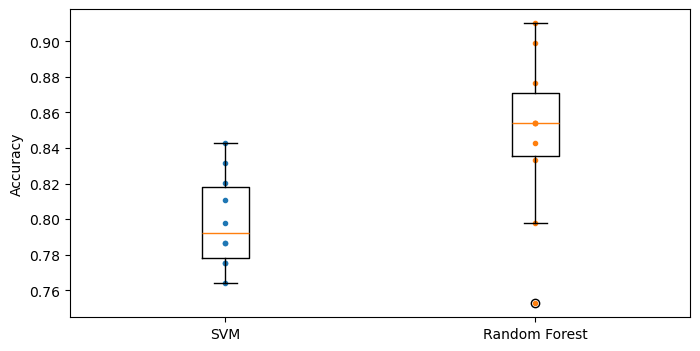

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot([1]*10, svm_scores, '.')
plt.plot([2]*10, forest_scores, '.')
plt.boxplot([svm_scores, forest_scores], labels=('SVM', 'Random Forest'))
plt.ylabel('Accuracy')
plt.show()

The random forest classifier got a very high score on one of the 10 folds, but overall it had a lower mean score, as well as a bigger spread, so it looks like the SVM classifier is more likely to generalize well.

To improve this result further, you could:

Compare many more models and tune hyperparameters using cross validation and grid search,
Do more feature engineering, for example:
Try to convert numerical attributes to categorical attributes: for example, different age groups had very different survival rates (see below), so it may help to create an age bucket category and use it instead of the age. Similarly, it may be useful to have a special category for people traveling alone since only 30% of them survived (see below).
Replace SibSp and Parch with their sum.
Try to identify parts of names that correlate well with the Survived attribute.
Use the Cabin column, for example take its first letter and treat it as a categorical attribute.

In [ ]:
train_data[['AgeBucket', 'Survived']].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [48]:
train_data['RelativesOnboard'] = train_data['SibSp'] + train_data['Parch']
train_data[['RelativesOnboard', 'Survived']].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


Use the Cabin column, for example take its first letter and treat it as a categorical attribute.

In [ ]:
train_data['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [51]:
train_data['Cabin_floor'] = train_data['Cabin'].str[0]
train_data['Cabin_floor'] = train_data['Cabin_floor'].astype('category')

In [52]:
train_data['Cabin_floor'].value_counts()

Cabin_floor
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

Try to identify parts of names that correlate well with the Survived attribute.

A) Let`s extract first the Title such as Mr, MRs, Miss...

In [54]:
train_data['Title'] = train_data['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

# Check survival rates by title
title_survival = train_data.groupby('Title')['Survived'].mean().sort_values(ascending=False)
print(title_survival)

Title
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.156673
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64


B - Extract surnames

In [60]:
train_data['Surname'] = train_data['Name'].str.split(',').str[0]

# Check survival by surname 
surname_survival = train_data.groupby('Surname')['Survived'].mean()
print(surname_survival.nsmallest(50))

Surname
Abbing            0.0
Adahl             0.0
Adams             0.0
Ahlin             0.0
Alexander         0.0
Alhomaki          0.0
Ali               0.0
Allum             0.0
Andreasson        0.0
Andrew            0.0
Arnold-Franchi    0.0
Artagaveytia      0.0
Asim              0.0
Attalah           0.0
Augustsson        0.0
Badt              0.0
Bailey            0.0
Balkic            0.0
Banfield          0.0
Barbara           0.0
Barton            0.0
Bateman           0.0
Baumann           0.0
Beavan            0.0
Bengtsson         0.0
Berglund          0.0
Berriman          0.0
Betros            0.0
Birkeland         0.0
Blackwell         0.0
Bostandyeff       0.0
Boulos            0.0
Bourke            0.0
Bowen             0.0
Bracken           0.0
Braund            0.0
Brewe             0.0
Brocklebank       0.0
Bryhl             0.0
Burke             0.0
Butler            0.0
Butt              0.0
Byles             0.0
Cacic             0.0
Cairns            0.0
Ca

C - Name length
Longer names might correlate with higher social class

In [62]:
train_data['Name_length'] = train_data['Name'].str.len()

# Compare survival by name length
print(train_data.groupby(pd.qcut(train_data['Name_length'], 4))['Survived'].mean())

Name_length
(11.999, 20.0]    0.230453
(20.0, 25.0]      0.325581
(25.0, 30.0]      0.364929
(30.0, 82.0]      0.626126
Name: Survived, dtype: float64


C:\Users\migig\AppData\Local\Temp\ipykernel_15040\3850747624.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train_data.groupby(pd.qcut(train_data['Name_length'], 4))['Survived'].mean())


Statistical Validation

In [64]:
from scipy.stats import chi2_contingency

#Create a contingency table: Title vs Survived
contingency_table = pd.crosstab(train_data['Title'], train_data['Survived'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f'Chi2 p-value: {p:.4f}')  # p < 0.05 implies significant correlation

Chi2 p-value: 0.0000


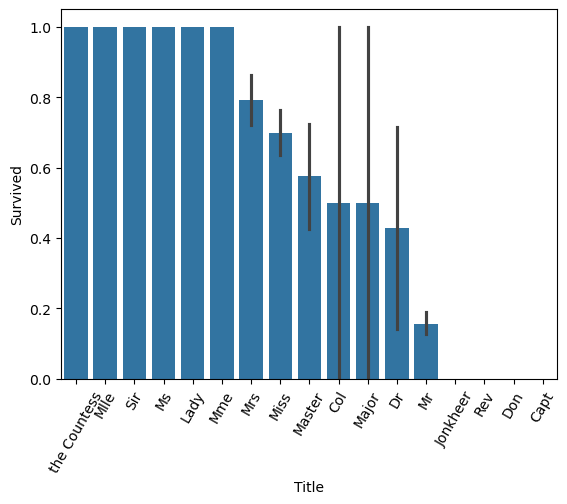

In [66]:
import seaborn as sns
# plot suvival rates by title
sns.barplot(x='Title', y='Survived', data=train_data, order=title_survival.index)
plt.xticks(rotation=60)
plt.show()